In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [2]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)

Preset Data

In [3]:
random_data = np.random.randint(10, size=(10240,100, 1) )

wiki plot: https://en.wikipedia.org/wiki/Activation_function#cite_note-15


library: https://www.tensorflow.org/api_docs/python/tf/keras/activations

graphs:https://mlfromscratch.com/activation-functions-explained/

# Mean

In [639]:
feature_data = Mean(random_data)

In [640]:
# best performance and time: relu ,softplus(the best one, 
# slower but also works:  gelu, swish
# activation functions with exponentials will not work on mean where the points have big slope changes do not fit.
mean_model = None
mean_model = Sequential([
    keras.layers.Flatten(input_shape=(100,1)),
#     keras.layers.Dense(128, activation= 'softplus'),
    keras.layers.Dense(64, activation= 'softplus'),
    keras.layers.Dense(32,activation= 'softplus'),
    keras.layers.Dense(16,activation= 'softplus'),
    keras.layers.Dense(8,activation= 'softplus'),
    keras.layers.Dense(4,activation= 'softplus'),
    keras.layers.Dense(2,activation= 'softplus'),
    keras.layers.Dense(1,activation= 'linear')
    
])

mean_model.compile(optimizer="adam", loss="mean_squared_error")


In [641]:
mean_model.fit(random_data, feature_data, epochs= 50)

Epoch 1/50
320/320 [==============================] - 1s 3ms/step - loss: 5.6446
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0186
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 4.5235e-04
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 2.4646e-04
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 1.3399e-04
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 9.6008e-05
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 6.6342e-05
Epoch 10/50
320/320 [==============================] - 1s 3ms/step - loss: 6.0049e-05
Epoch 11/50
320/320 [==============================] - 1s 3ms/step - loss: 4.6942e-05
Epoch 12/50
320/320 [==============================] - 1s 3ms/step - loss: 3.60

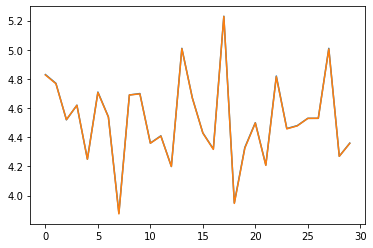

In [643]:
Predirect_arr = np.random.randint(10, size=(30,100, 1))
plt.plot(range(30),np.mean(Predirect_arr, axis=1),range(30),mean_model.predict(Predirect_arr))

# STD

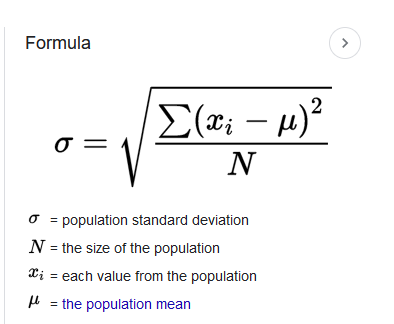

In [84]:
random_data2 = np.random.randint(10, size=(20000,40, 1) )

In [85]:
feature_data = Std(random_data2)

In [86]:
# good performance: 
# not work: softplus elu gelu selu softsign swish tanh
std_model = Sequential([
    keras.layers.Flatten(input_shape=(40,1)),
    #BatchNormalization(),
    keras.layers.Dense(100, activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'relu'),
    keras.layers.Dense(350,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(520,activation= 'relu'),
    keras.layers.Dense(300,activation= 'relu'),
    keras.layers.Dense(200,activation= 'relu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'relu'),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(20,activation= 'relu'),
    keras.layers.Dense(10,activation= 'relu'),
    keras.layers.Dense(4,activation= 'relu'),
    keras.layers.Dense(1,activation= 'linear')
    
])

std_model.compile(optimizer="adam", loss="mean_squared_error")


In [141]:
#std_model.fit(random_data2, feature_data, epochs= 2000)

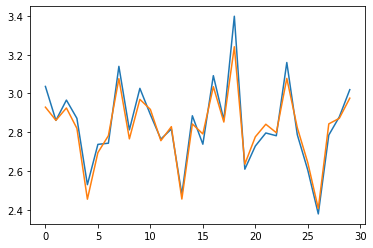

In [91]:
Predirect_arr = np.random.randint(10, size=(30,40, 1))
plt.plot(range(30),np.std(Predirect_arr, axis=1),range(30),std_model.predict(Predirect_arr))

In [92]:
std_model.save("./Models/Models2std11hiddenlongwidthfinal.h5")

# Variance

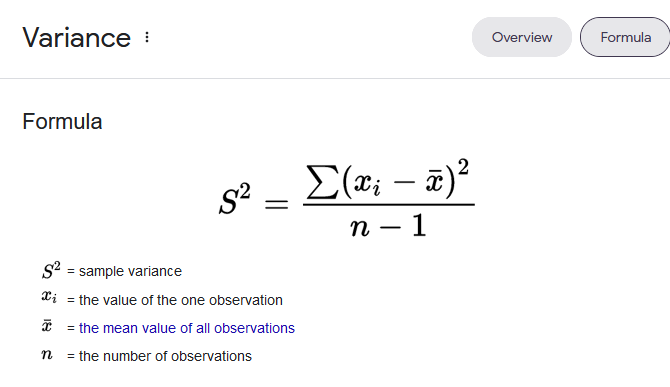

In [113]:
random_data3 = np.random.randint(10, size=(20000,40, 1) )

In [114]:
feature_data = Var(random_data3)

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [115]:
# relu alone does not work when a big change in slope, elu seems working well, swish selu, elu
# not work: softsign, softplus
#var_model = load_model('./Models/Models2var.h5')
var_model = Sequential([
    # kernel_initializer="glorot_uniform"
    keras.layers.Flatten(input_shape=(40,1)),
    #keras.layers.BatchNormalization(),
#     keras.layers.Dense(512,activation= 'swish'),
#     keras.layers.Dense(128,activation= 'relu'),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(100,activation= 'selu'),
    keras.layers.Dense(250,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(400,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(350,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(200,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(150,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(120,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(80,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(50,activation= 'selu'),
    #BatchNormalization(),
    keras.layers.Dense(30,activation= 'selu'),
    keras.layers.Dense(8,activation= 'selu'),
    
    keras.layers.Dense(1,activation= 'linear'),
    
])

var_model.compile(optimizer="adam", loss="mean_squared_error")

In [140]:
# optimizer = keras.optimizers.Adam()
# var_model.compile(optimizer=optimizer, loss="mean_squared_error")
#var_model.fit(random_data3, feature_data, epochs= 300)

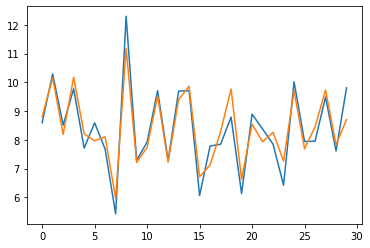

In [138]:
Predirect_arr = np.random.randint(10, size=(30,40, 1))

plt.plot(range(30),np.var(Predirect_arr, axis=1),range(30),var_model.predict(Predirect_arr))

In [139]:
var_model.save("./Models/Models2varfinal.h5")